In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Clean_Data.csv")

In [3]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [6]:
y_pred = knn.predict(X_test)

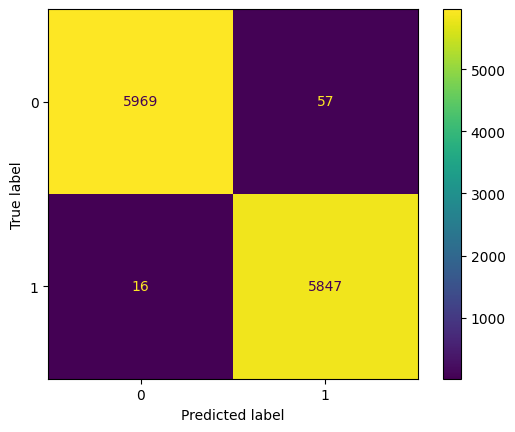

In [7]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6026
           1       0.99      1.00      0.99      5863

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {:,.3f}".format(accuracy_score(y_test, y_pred) * 100))

Accuracy Score: 99.386


In [9]:
error = []
accuracy = []
# Calculating error and accuracy for K values between 1 and 40
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

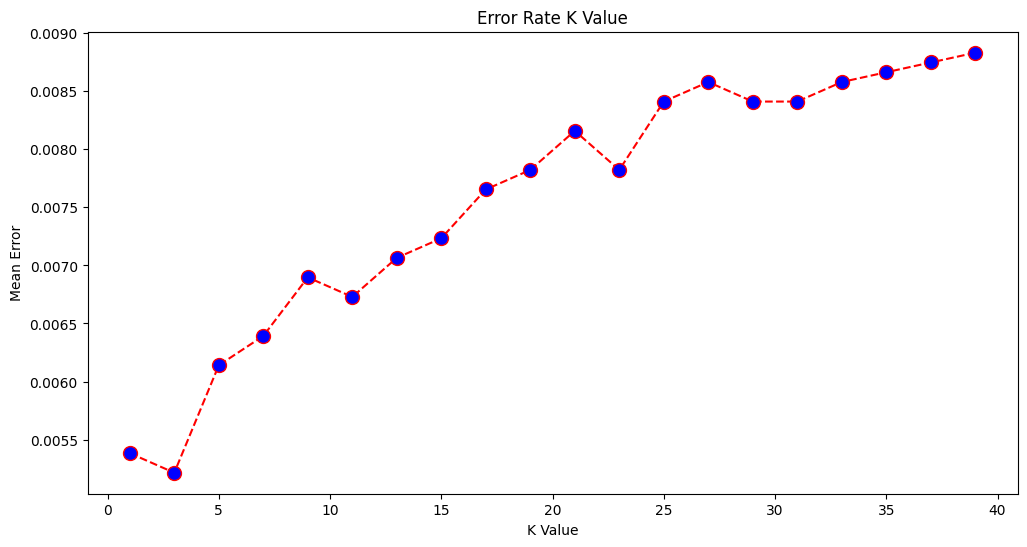

In [10]:
# Plotting the graph of K value vs Error rate
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

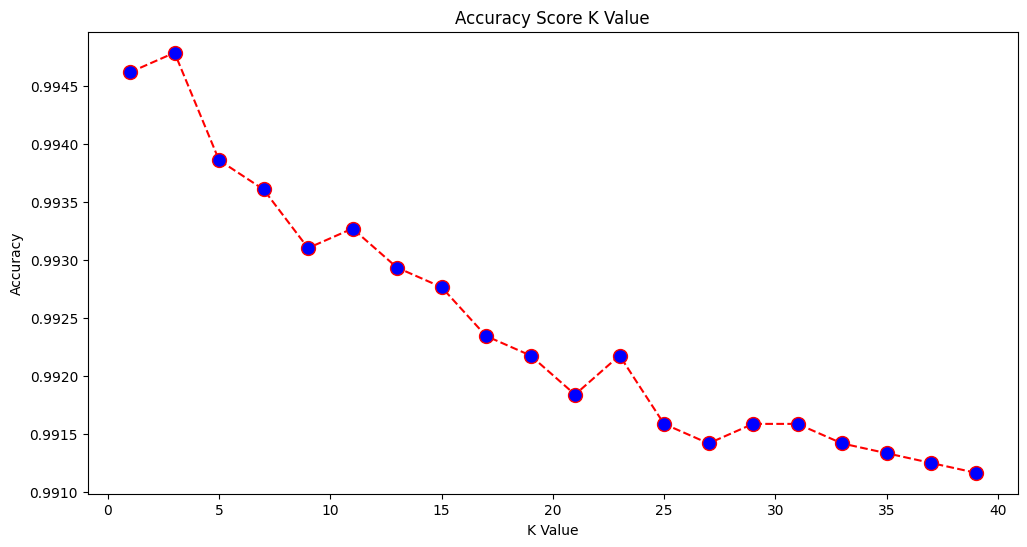

In [11]:
# Plotting the graph of K value vs Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

We observe that k=3 provides best accuracy and lowest error rate

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred1 = knn.predict(X_test)

Accuracy Score: 99.479


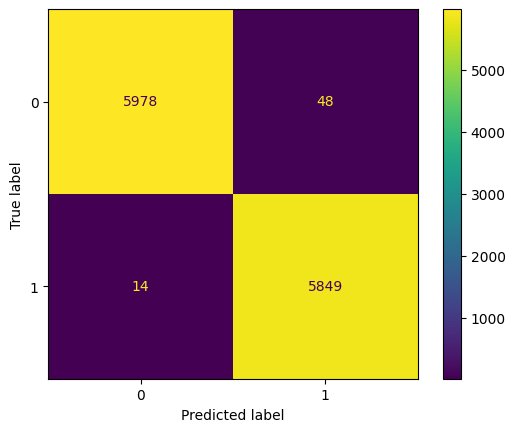

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6026
           1       0.99      1.00      0.99      5863

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



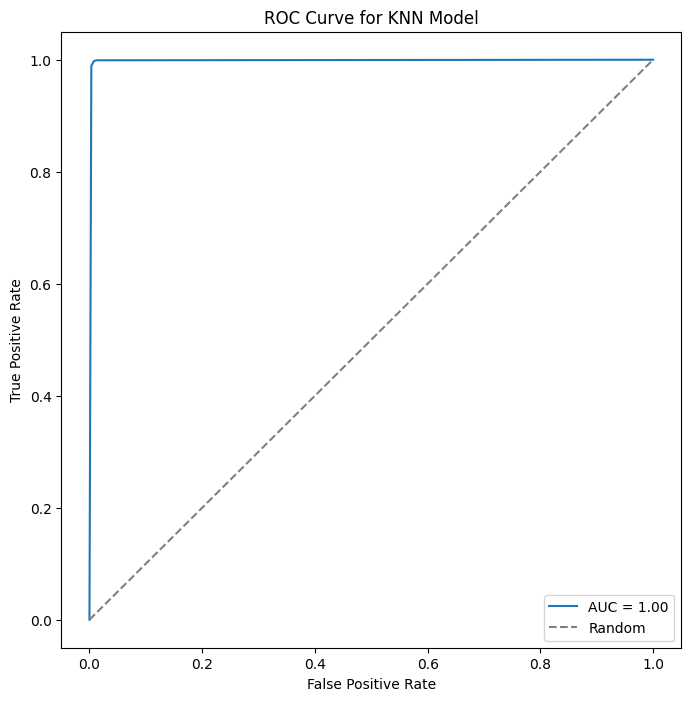

AUC Score for KNN Model: 0.9978


In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {:,.3f}".format(accuracy_score(y_test, y_pred1) * 100))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.show()
print(classification_report(y_test, y_pred1))

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_test is your test set features and y_test is the corresponding true labels
y_prob_knn = knn.predict_proba(X_test)[:, 1]  # Note: KNN does not have predict_proba by default

# ROC Curve and AUC Score
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
auc_score_knn = roc_auc_score(y_test, y_prob_knn)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, label=f'AUC = {auc_score_knn:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for KNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'AUC Score for KNN Model: {auc_score_knn:.4f}')
